In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
dataset = pd.read_json('dev_akademi.json')

In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101557 entries, 0 to 101556
Data columns (total 17 columns):
ad_bid_price_kurus       101506 non-null float64
ad_call_to_action        101534 non-null object
ad_daily_budget_kurus    101518 non-null float64
ad_description           101525 non-null object
ad_id                    101557 non-null int64
ad_title                 101509 non-null object
event_category           101525 non-null object
event_date               101513 non-null float64
event_type               101520 non-null object
id                       101557 non-null int64
viewer_birt_year         101516 non-null float64
viewer_education         101514 non-null object
viewer_gender            101525 non-null object
viewer_job               101528 non-null object
viewer_marital_status    101518 non-null object
viewer_user_city         101525 non-null object
viewer_user_id           101557 non-null int64
dtypes: float64(4), int64(3), object(10)
memory usage: 13.2+ MB


In [215]:
dataset[pd.isnull(dataset).any(axis=1)].shape # rows that contain missing value in any given column

(522, 17)

In [216]:
dataset.head()

,ad_bid_price_kurus,ad_call_to_action,ad_daily_budget_kurus,ad_description,ad_id,ad_title,event_category,event_date,event_type,id,viewer_birt_year,viewer_education,viewer_gender,viewer_job,viewer_marital_status,viewer_user_city,viewer_user_id
0,1000.0,8b36e9 6f041af,200000.0,8b36e9 ee1a793907 0ba 29c8ae3130 529230e5a4a 6...,10,6e809498e59 8b36e9 509f987 cc77d627 1650f9 d6badc,İkinci El ve Sıfır Alışveriş,1.514756e+09,IMPRESSION,1,1975.0,Üniversite,E,Özel Sektör,Evli,İstanbul,3622
1,160.0,362131e 862,2000.0,918dde365e8 b28d 30414de2 c 55 cd4b502 0172072...,13,b4fa8676d 1a02f0171 4602 b3a3eaaedc1,Emlak,1.514757e+09,IMPRESSION,2,1975.0,Üniversite,E,Özel Sektör,Evli,İstanbul,3622
2,160.0,362131e 862,2000.0,918dde365e8 b28d 30414de2 c 55 cd4b502 0172072...,13,b4fa8676d 1a02f0171 4602 b3a3eaaedc1,Emlak,1.514757e+09,IMPRESSION,3,1975.0,Üniversite,E,Özel Sektör,Evli,İstanbul,3622
3,1000.0,8b36e9 6f041af,200000.0,8b36e9 ee1a793907 0ba 29c8ae3130 529230e5a4a 6...,10,6e809498e59 8b36e9 509f987 cc77d627 1650f9 d6badc,İkinci El ve Sıfır Alışveriş,1.514766e+09,IMPRESSION,4,1979.0,Üniversite,E,Serbest Meslek,Evli,Düzce,2156
4,1000.0,8b36e9 6f041af,200000.0,8b36e9 ee1a793907 0ba 29c8ae3130 529230e5a4a 6...,10,6e809498e59 8b36e9 509f987 cc77d627 1650f9 d6badc,İkinci El ve Sıfır Alışveriş,1.514766e+09,IMPRESSION,5,1979.0,Üniversite,E,Serbest Meslek,Evli,Düzce,2156


In [217]:
dataset.ad_call_to_action.value_counts()

efc4a 0facdb a39        9913
9585a 59ec              8449
efc4a 9585a 59ec        8065
efc4a d359 b4bef5a0     6327
b41b 5f0aa c37936       5991
efc4a 9585a a39         4941
86c7402 688a            4804
887068e 3a0c6f9 442d    4348
720b252 c47c68e         3543
efc4a e6eb6ddf          2905
efc4a 9585a 25391       2811
ec93a 1896f7 8e48       2543
ad62 3c34e1bc           1951
eafa6fd78 6f793         1944
6e10d9a 096835f14       1703
eea 31 1e1              1511
facb2 1af821            1465
efc4a e45babff696d2     1458
1d4a27                  1317
ecc7cbc bff371804       1251
efc4a 1d4a27            1209
6409a4a 9585a c28a       901
6409a4a 9585a            859
821e45d 78869f           637
455cb 707                624
acb9e32 ff967 8e48       604
807264                   599
9585a c28a 03715bdcf     578
bfff8af3f7609621ceb6     575
efc4a aa5 c9             573
                        ... 
096835f14                 92
5df175f 71c 83            92
6b39 89973 536a           90
96a0c cee9 9d8

In [218]:
dataset[dataset.viewer_birt_year > 0].viewer_birt_year.describe()

count    101470.000000
mean       1983.313866
std           7.246696
min        1970.000000
25%        1977.000000
50%        1984.000000
75%        1989.000000
max        2000.000000
Name: viewer_birt_year, dtype: float64

In [219]:
dataset.event_type.value_counts()

IMPRESSION    100155
CLICK           1334
                  31
Name: event_type, dtype: int64

In [220]:
dataset.ad_id.value_counts().shape # 188 unique ads

(188,)

In [221]:
dataset.viewer_job.value_counts() # 9 Unique Jobs 1 is null.

Özel Sektör       64778
Serbest Meslek    34104
Emekli             1061
Öğrenci             639
Kamu Çalışanı       410
Çiftçi              269
Çalışmıyorum        227
                     36
Ev Hanımı             4
Name: viewer_job, dtype: int64

In [222]:
dataset.describe()

,ad_bid_price_kurus,ad_daily_budget_kurus,ad_id,event_date,id,viewer_birt_year,viewer_user_id
count,101506.000000,1.015180e+05,101557.000000,1.015130e+05,101557.000000,101516.000000,101557.000000
mean,423.886233,5.444260e+04,80.610888,1.524596e+09,50779.000000,1982.415166,2860.604006
std,477.204469,9.548950e+04,51.962733,3.427416e+07,29317.124981,42.826452,1757.511112
min,0.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,1.000000
25%,136.000000,2.000000e+04,30.000000,1.518606e+09,25390.000000,1977.000000,1274.000000
50%,260.000000,3.200000e+04,74.000000,1.526724e+09,50779.000000,1984.000000,2859.000000
75%,480.000000,6.000000e+04,121.000000,1.531563e+09,76168.000000,1989.000000,4300.000000
max,4000.000000,1.200000e+06,200.000000,1.539759e+09,101557.000000,2000.000000,6504.000000


In [223]:
explore_df = dataset[['ad_call_to_action','event_type']]
explore_df = explore_df[explore_df.ad_call_to_action.notnull()]
explore_df = explore_df[explore_df.ad_call_to_action != ""]
explore_df = explore_df[explore_df.event_type.notnull()]
explore_df = explore_df[explore_df.event_type != ""]

In [224]:
explore_df.head()

,ad_call_to_action,event_type
0,8b36e9 6f041af,IMPRESSION
1,362131e 862,IMPRESSION
2,362131e 862,IMPRESSION
3,8b36e9 6f041af,IMPRESSION
4,8b36e9 6f041af,IMPRESSION


In [225]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101425 entries, 0 to 101556
Data columns (total 2 columns):
ad_call_to_action    101425 non-null object
event_type           101425 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [226]:
explore_df.ad_call_to_action.value_counts()

efc4a 0facdb a39        9907
9585a 59ec              8444
efc4a 9585a 59ec        8061
efc4a d359 b4bef5a0     6323
b41b 5f0aa c37936       5987
efc4a 9585a a39         4937
86c7402 688a            4802
887068e 3a0c6f9 442d    4344
720b252 c47c68e         3536
efc4a e6eb6ddf          2905
efc4a 9585a 25391       2810
ec93a 1896f7 8e48       2541
ad62 3c34e1bc           1949
eafa6fd78 6f793         1943
6e10d9a 096835f14       1702
eea 31 1e1              1511
facb2 1af821            1463
efc4a e45babff696d2     1457
1d4a27                  1316
ecc7cbc bff371804       1251
efc4a 1d4a27            1209
6409a4a 9585a c28a       901
6409a4a 9585a            858
821e45d 78869f           637
455cb 707                623
acb9e32 ff967 8e48       603
807264                   599
9585a c28a 03715bdcf     578
bfff8af3f7609621ceb6     575
efc4a aa5 c9             573
                        ... 
2777464 d70 3c           103
096835f14                 92
5df175f 71c 83            92
6b39 89973 536

In [227]:
explore_df.event_type.value_counts()

IMPRESSION    100091
CLICK           1334
Name: event_type, dtype: int64

In [228]:
explore_df = pd.concat([explore_df.ad_call_to_action, pd.get_dummies(explore_df.event_type, prefix='event')], axis=1)

In [229]:
explore_df.head()

,ad_call_to_action,event_CLICK,event_IMPRESSION
0,8b36e9 6f041af,0,1
1,362131e 862,0,1
2,362131e 862,0,1
3,8b36e9 6f041af,0,1
4,8b36e9 6f041af,0,1


In [230]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101425 entries, 0 to 101556
Data columns (total 3 columns):
ad_call_to_action    101425 non-null object
event_CLICK          101425 non-null uint8
event_IMPRESSION     101425 non-null uint8
dtypes: object(1), uint8(2)
memory usage: 1.7+ MB


In [231]:
grouped_df = explore_df.groupby('ad_call_to_action')['event_CLICK', 'event_IMPRESSION'].sum()

In [232]:
grouped_df.head()

,event_CLICK,event_IMPRESSION
ad_call_to_action,,
0800e c8a01,5.0,282.0
088ef bc6bc3ac4e0,4.0,59.0
096835f14,3.0,89.0
0ac6c2 1faf0 759cba,3.0,116.0
0d68efa 95cbcd2,3.0,108.0


In [233]:
grouped_df = grouped_df.assign(conversion_rate= (grouped_df.event_CLICK/grouped_df.event_IMPRESSION)*100)

In [234]:
grouped_df = grouped_df.reset_index()

In [235]:
grouped_df = grouped_df.drop(['event_CLICK','event_IMPRESSION'], axis=1)

In [236]:
grouped_df.head()

,ad_call_to_action,conversion_rate
0,0800e c8a01,1.773050
1,088ef bc6bc3ac4e0,6.779661
2,096835f14,3.370787
3,0ac6c2 1faf0 759cba,2.586207
4,0d68efa 95cbcd2,2.777778


In [237]:
grouped_df.describe()

,conversion_rate
count,119.000000
mean,2.958055
std,3.400074
min,0.000000
25%,1.254007
50%,1.898734
75%,3.703704
max,33.333333


In [238]:
grouped_df.sort_values(by=['conversion_rate'], ascending=False)

,ad_call_to_action,conversion_rate
48,73f3465 9c6add8,33.333333
7,16e c5221 e5367,9.836066
14,230c29 56883165,8.163265
100,efc4a 5c1453,7.894737
5,0e649c05 0917 e37271,7.317073
36,6848b24 2ba6d8,7.142857
116,ff967 0917,6.818182
1,088ef bc6bc3ac4e0,6.779661
75,bd6ad4035bc35,6.493506
101,efc4a 883170,5.882353


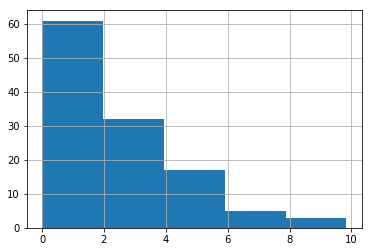

In [239]:
grouped_df.conversion_rate[grouped_df.conversion_rate < 30].hist(bins=5) # actually dataset is divided around 2

In [240]:
top_calls = grouped_df.ad_call_to_action[grouped_df.conversion_rate > 4] # over 4% conversion rate is the best part 

In [241]:
top_calls.value_counts()

7ce3c6385 0d68efa       1
efc4a 5c1453            1
e990f76 d70 3c          1
73f3465 9c6add8         1
230c29 56883165         1
efc4a 883170            1
552826e 71c 71c 83      1
facb2 5c1453            1
5df175f 71c 71c 83      1
4e29 2d2785             1
29c27109 9c6add8        1
088ef bc6bc3ac4e0       1
16e c5221 e5367         1
139ca38 9               1
be4174 3 90af8 5d0a     1
34dbc40edd4b            1
bd6ad4035bc35           1
230c29                  1
0e649c05 0917 e37271    1
73f3465 3612            1
6848b24 2ba6d8          1
ff967 0917              1
9585a df10              1
1f 1d9060 5655342       1
dcc25e4 d70 3c          1
Name: ad_call_to_action, dtype: int64

In [242]:
unique_call_words = []

In [245]:
for word in top_calls:
    for ww in word.split():
        print(ww)
        unique_call_words.append(ww)

088ef
bc6bc3ac4e0
0e649c05
0917
e37271
139ca38
9
16e
c5221
e5367
1f
1d9060
5655342
230c29
230c29
56883165
29c27109
9c6add8
34dbc40edd4b
4e29
2d2785
552826e
71c
71c
83
5df175f
71c
71c
83
6848b24
2ba6d8
73f3465
3612
73f3465
9c6add8
7ce3c6385
0d68efa
9585a
df10
bd6ad4035bc35
be4174
3
90af8
5d0a
dcc25e4
d70
3c
e990f76
d70
3c
efc4a
5c1453
efc4a
883170
facb2
5c1453
ff967
0917


In [246]:
# These are the top words used in a callToAction that might get you to over 4% conversion rate (click/impression)
unique_call_words

['088ef',
 'bc6bc3ac4e0',
 '0e649c05',
 '0917',
 'e37271',
 '139ca38',
 '9',
 '16e',
 'c5221',
 'e5367',
 '1f',
 '1d9060',
 '5655342',
 '230c29',
 '230c29',
 '56883165',
 '29c27109',
 '9c6add8',
 '34dbc40edd4b',
 '4e29',
 '2d2785',
 '552826e',
 '71c',
 '71c',
 '83',
 '5df175f',
 '71c',
 '71c',
 '83',
 '6848b24',
 '2ba6d8',
 '73f3465',
 '3612',
 '73f3465',
 '9c6add8',
 '7ce3c6385',
 '0d68efa',
 '9585a',
 'df10',
 'bd6ad4035bc35',
 'be4174',
 '3',
 '90af8',
 '5d0a',
 'dcc25e4',
 'd70',
 '3c',
 'e990f76',
 'd70',
 '3c',
 'efc4a',
 '5c1453',
 'efc4a',
 '883170',
 'facb2',
 '5c1453',
 'ff967',
 '0917']